# Stable Baselines, a Fork of OpenAI Baselines - Monitor Training and Plotting

Github Repo: [https://github.com/hill-a/stable-baselines](https://github.com/hill-a/stable-baselines)

Medium article: [https://medium.com/@araffin/stable-baselines-a-fork-of-openai-baselines-df87c4b2fc82](https://medium.com/@araffin/stable-baselines-a-fork-of-openai-baselines-df87c4b2fc82)

[RL Baselines Zoo](https://github.com/araffin/rl-baselines-zoo) is a collection of pre-trained Reinforcement Learning agents using Stable-Baselines.

It also provides basic scripts for training, evaluating agents, tuning hyperparameters and recording videos.

Documentation is available online: [https://stable-baselines.readthedocs.io/](https://stable-baselines.readthedocs.io/)

## Install Dependencies and Stable Baselines Using Pip

List of full dependencies can be found in the [README](https://github.com/hill-a/stable-baselines).

```
sudo apt-get update && sudo apt-get install cmake libopenmpi-dev zlib1g-dev
```


```
pip install stable-baselines[mpi]
```

In [ ]:
# !apt install swig cmake libopenmpi-dev zlib1g-dev
# !pip install stable-baselines[mpi]==2.8.0 box2d box2d-kengz
# Stable Baselines only supports tensorflow 1.x for now
# %tensorflow_version 1.x

In [1]:
%load_ext autoreload
%autoreload 2

try:
    %%tensorflow_version 1.x
except:
    pass

import os
import sys
print('inserting the following to path',os.path.abspath('..'))
sys.path.insert(0,os.path.abspath('..'))
print(sys.path)

inserting the following to path /home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines
['/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines', '/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines/my_colabs', '/opt/anaconda3/envs/tf15/lib/python37.zip', '/opt/anaconda3/envs/tf15/lib/python3.7', '/opt/anaconda3/envs/tf15/lib/python3.7/lib-dynload', '', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages/IPython/extensions', '/home/gkoren2/.ipython']


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




985 timesteps
Best mean reward: -inf - Last mean reward per episode: -343.02
Saving new best model
1980 timesteps
Best mean reward: -343.02 - Last mean reward per episode: -451.68
2982 timesteps
Best mean reward: -343.02 - Last mean reward per episode: -491.75
3970 timesteps
Best mean reward: -343.02 - Last mean reward per episode: -465

43960 timesteps
Best mean reward: -193.43 - Last mean reward per episode: -190.58
Saving new best model
44890 timesteps
Best mean reward: -190.58 - Last mean reward per episode: -189.67
Saving new best model
45936 timesteps
Best mean reward: -189.67 - Last mean reward per episode: -185.06
Saving new best model
46981 timesteps
Best mean reward: -185.06 - Last mean reward per episode: -182.48
Saving new best model
47936 timesteps
Best mean reward: -182.48 - Last mean reward per episode: -178.53
Saving new best model
48815 timesteps
Best mean reward: -178.53 - Last mean reward per episode: -175.47
Saving new best model
49944 timesteps
Best mean reward: -175.47 - Last mean reward per episode: -172.03
Saving new best model
50949 timesteps
Best mean reward: -172.03 - Last mean reward per episode: -167.19
Saving new best model
51902 timesteps
Best mean reward: -167.19 - Last mean reward per episode: -161.87
Saving new best model
52796 timesteps
Best mean reward: -161.87 - Last mean reward per

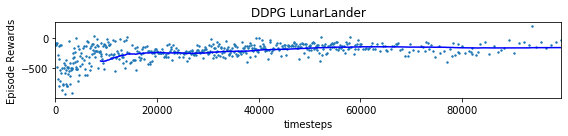

In [2]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.ddpg.ddpg import DDPG
from stable_baselines.ddpg.noise import AdaptiveParamNoiseSpec
from stable_baselines import results_plotter


best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
    """
    Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
    :param _locals: (dict)
    :param _globals: (dict)
    """
    global n_steps, best_mean_reward
    # Print stats every 1000 calls
    if (n_steps + 1) % 1000 == 0:
        # Evaluate policy training performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            print(x[-1], 'timesteps')
            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

            # New best model, you could save the agent here
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model")
                _locals['self'].save(log_dir + 'best_model.pkl')
    n_steps += 1
    return True

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('LunarLanderContinuous-v2')
env = Monitor(env, log_dir, allow_early_resets=True)

# Add some param noise for exploration
param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.1, desired_action_stddev=0.1)
# Because we use parameter noise, we should use a MlpPolicy with layer normalization
model = DDPG(LnMlpPolicy, env, param_noise=param_noise, verbose=0)
# Train the agent
time_steps = 1e5
model.learn(total_timesteps=int(time_steps), callback=callback)

results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "DDPG LunarLander")
plt.show()

## Import policy, RL agent, Wrappers

In [3]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import DDPG, TD3
from stable_baselines.common.noise import AdaptiveParamNoiseSpec, NormalActionNoise

## Define a Callback Function


In [4]:
best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
    """
    Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
    :param _locals: (dict)
    :param _globals: (dict)
    """
    global n_steps, best_mean_reward
    # Print stats every 1000 calls
    if (n_steps + 1) % 1000 == 0:
        # Evaluate policy training performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            print(x[-1], 'timesteps')
            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

            # New best model, you could save the agent here
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model")
                _locals['self'].save(log_dir + 'best_model.pkl')
    n_steps += 1
    # Returning False will stop training early
    return True

## Create and wrap the environment

We will be using Lunar Lander environment with continuous actions

In [5]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('LunarLanderContinuous-v2')
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir, allow_early_resets=True)

## Define and train the DDPG agent

In [6]:
# Add some param noise for exploration
param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.1, desired_action_stddev=0.1)
# Because we use parameter noise, we should use a MlpPolicy with layer normalization
model = DDPG(LnMlpPolicy, env, param_noise=param_noise, verbose=0)
# Train the agent
model.learn(total_timesteps=int(1e5), callback=callback)

956 timesteps
Best mean reward: -inf - Last mean reward per episode: -284.01
Saving new best model
1995 timesteps
Best mean reward: -284.01 - Last mean reward per episode: -232.15
Saving new best model
2964 timesteps
Best mean reward: -232.15 - Last mean reward per episode: -210.30
Saving new best model
3982 timesteps
Best mean reward: -210.30 - Last mean reward per episode: -194.27
Saving new best model
4950 timesteps
Best mean reward: -194.27 - Last mean reward per episode: -181.00
Saving new best model
5965 timesteps
Best mean reward: -181.00 - Last mean reward per episode: -170.49
Saving new best model
6957 timesteps
Best mean reward: -170.49 - Last mean reward per episode: -164.66
Saving new best model
7989 timesteps
Best mean reward: -164.66 - Last mean reward per episode: -147.08
Saving new best model
8897 timesteps
Best mean reward: -147.08 - Last mean reward per episode: -129.40
Saving new best model
9932 timesteps
Best mean reward: -129.40 - Last mean reward per episode: -133

98971 timesteps
Best mean reward: -129.40 - Last mean reward per episode: -137.93
99971 timesteps
Best mean reward: -129.40 - Last mean reward per episode: -136.43


## Plotting helpers

Stable Baselines has some built-in plotting helper, that you can find in `stable_baselines.results_plotter`. However, to show how to do it yourself, we are going to use custom plotting functions. 

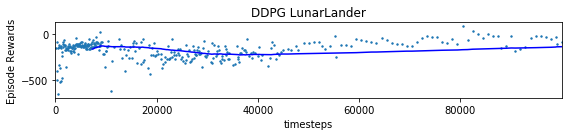

In [7]:
from stable_baselines import results_plotter

# Helper from the library
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "DDPG LunarLander")

In [8]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


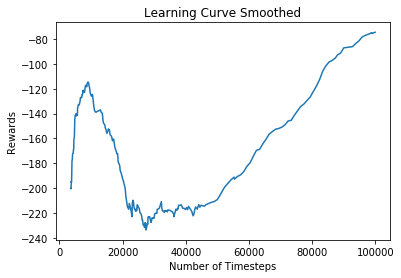

In [9]:
plot_results(log_dir)

## TD3 vs DDPG

TD3 is the successor of DDPG (cf [Documentation](https://stable-baselines.readthedocs.io/)

In [ ]:
# Create log dir
log_dir = "/tmp/gym/td3/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('LunarLanderContinuous-v2')
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir, allow_early_resets=True)

In [ ]:
# Create action noise because TD3 and DDPG use a deterministic policy
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

In [ ]:
net_kwargs = dict(layers=[400, 300])
model_td3 = TD3("MlpPolicy", env, action_noise=action_noise, verbose=0)

In [ ]:
# Avoid the need of global variables
model_td3.best_mean_reward, model_td3.n_steps = -np.inf, 0

def callback(_locals, _globals):
    """
    Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
    :param _locals: (dict)
    :param _globals: (dict)
    """
    # Retrieve the self object
    self_ = _locals['self']
    # Print stats every 1000 calls
    if (self_.n_steps + 1) % 1000 == 0:
        # Evaluate policy training performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            print(x[-1], 'timesteps')
            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self_.best_mean_reward, mean_reward))

            # New best model, you could save the agent here
            if mean_reward > self_.best_mean_reward:
                self_.best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model")
                self_.save(log_dir + 'best_model.pkl')
    self_.n_steps += 1
    # Returning False will stop training early
    return True

In [ ]:
# Train the agent
model_td3.learn(total_timesteps=int(1e5), callback=callback)

In [ ]:
plot_results(log_dir)